# Inspecting the Model Acc Test Results

In [1]:
import pandas as pd

In [280]:
experiments = pd.read_csv('model_search/' + 'all_model_runs.csv')

In [150]:
new_cols = experiments.columns.values
new_cols[0] = 'rowid'

In [15]:
experiments.columns = new_cols
experiments

,rowid,exp_name,model_name,evaluation_dataset,time_steps,train_count,overall_acc,epochs,tile_size,training_time,...,forest_acc_prod,cult_acc_prod,barren_acc_prod,wetland_acc_prod,water_acc_user,dev_acc_user,forest_acc_user,cult_acc_user,barren_acc_user,wetland_acc_user
0,0,fullval_keras_tests,rcnn,2000test,5,1500.0,0.955556,60,9,0 days 00:04:05.556393000,...,0.9,0.9,0.967,0.983,1.0,0.937,0.973,0.931,0.967,0.929


In [ ]:
make a scatter plot of overall acc for 2000 and 2010 for each model type

color by model type and make shape the evaluation_dataset
    also x could just be the model and y could be the accuracy

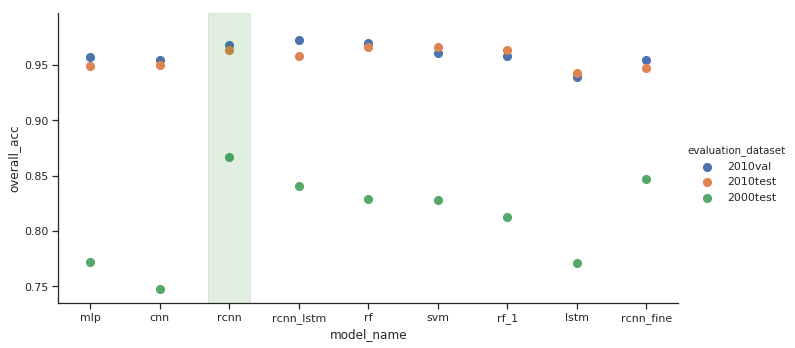

In [296]:
import numpy 
import pandas
from  matplotlib import pyplot
import seaborn
seaborn.set(style='ticks')


fg = seaborn.FacetGrid(data=experiments, hue='evaluation_dataset', height=5, aspect=1.95)
fg.map(pyplot.scatter, 'model_name', 'overall_acc', s=65).add_legend()
plt.axvspan(1.7, 2.3, alpha=0.12, color='green')
plt.savefig('model_comparisons.png', dpi=600)

(0.6, 1)

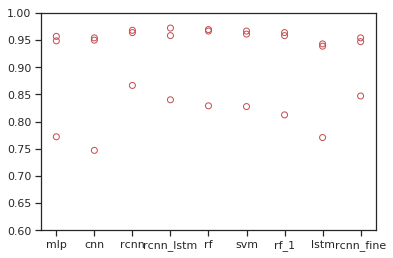

In [282]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(experiments['model_name'], experiments['overall_acc'], facecolors='none', edgecolors='r')
ax.set_ylim(.6,1)

In [283]:
from random import uniform

x_spacing = []
for index, exp in experiments.iterrows():
    if exp['model_name'] == 'mlp':
        x_location = 1
    elif exp['model_name'] == 'cnn':
        x_location = 2
    elif exp['model_name'] == 'rcnn':
        x_location = 3
    elif exp['model_name'] == 'rcnn_lstm':
        x_location = 4
    elif exp['model_name'] == 'rf':
        x_location = 5
    elif exp['model_name'] == 'svm':
        x_location = 6
    elif exp['model_name'] == 'rf_1':
        x_location = 7
    elif exp['model_name'] == 'lstm':
        x_location = 8
    elif exp['model_name'] == 'rcnn_fine':
        x_location = 9
        
    if exp['evaluation_dataset'] == '2000test':
        x_location += 0.3
    elif exp['evaluation_dataset'] == '2010test':
        x_location += 0
    elif exp['evaluation_dataset'] == '2010val':
        x_location -= 0.3
    x_location += uniform(0, 0.03)
    x_spacing.append(x_location)
x_spacing

[0.7202446068794337,
 1.002773240958175,
 1.327493724241958,
 1.712493557566839,
 2.0151496489671232,
 2.3214284070725273,
 2.7244116983381135,
 3.0018359539925616,
 3.312478280470189,
 4.310257069155059,
 4.016421207582467,
 3.7051727392691176,
 4.725615999590167,
 5.012412432830571,
 5.308580275750308,
 6.3077714371030735,
 6.004131576290444,
 5.715318794091432,
 6.718698355813578,
 7.000934168990428,
 7.308983244029433,
 7.71770013426606,
 8.025899544173583,
 8.310713650701317,
 9.320103490326373,
 9.014341889682136,
 8.72838419928694]

In [284]:
x_spacing = np.array(x_spacing)

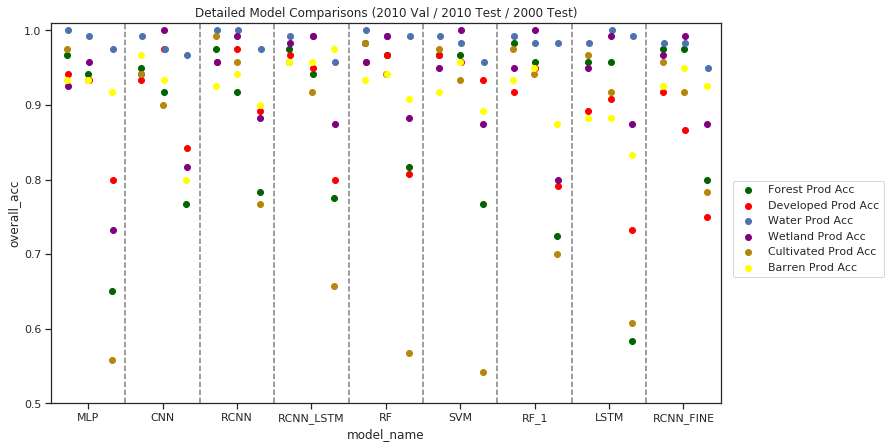

In [299]:
fig, ax = plt.subplots(figsize=(12,7))

jitter = 0.01

ax.scatter(x_spacing+[uniform(-jitter, jitter)] * (len(x_spacing)), experiments['forest_acc_prod'], label='Forest Prod Acc', marker='o', facecolors='darkgreen', edgecolors='darkgreen')
ax.scatter(x_spacing+[uniform(-jitter, jitter)] * (len(x_spacing)), experiments['dev_acc_prod'], label='Developed Prod Acc', marker='o', facecolors='red', edgecolors='red')
ax.scatter(x_spacing+[uniform(-jitter, jitter)] * (len(x_spacing)), experiments['water_acc_prod'], label='Water Prod Acc', marker='o', facecolors='b', edgecolors='b')
ax.scatter(x_spacing+[uniform(-jitter, jitter)] * (len(x_spacing)), experiments['wetland_acc_prod'], label='Wetland Prod Acc', marker='o', facecolors='purple', edgecolors='purple')
ax.scatter(x_spacing+[uniform(-jitter, jitter)] * (len(x_spacing)), experiments['cult_acc_prod'], label='Cultivated Prod Acc', marker='o', facecolors='darkgoldenrod', edgecolors='darkgoldenrod')
ax.scatter(x_spacing+[uniform(-jitter, jitter)] * (len(x_spacing)), experiments['barren_acc_prod'], label='Barren Prod Acc', marker='o', facecolors='yellow', edgecolors='yellow')
ax.set_ylim(0.50,1.01)

ax.axvline(x=1.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=2.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=3.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=4.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=5.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=6.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=7.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=8.5, c='black', linestyle='--', alpha=0.5)
#ax.axvline(x=1.5, c='black', linestyle='--', alpha=0.5)
ax.set_xlim(0.5,9.5)

ax.set_xticklabels(['empty','MLP', 'CNN', 'RCNN', 'RCNN_LSTM', 'RF', 'SVM', 'RF_1', 'LSTM', 'RCNN_FINE'])
ax.set_xlabel('model_name')
ax.set_ylabel('overall_acc')
ax.set_title('Detailed Model Comparisons (2010 Val / 2010 Test / 2000 Test)')
ax.legend(bbox_to_anchor=(1.01, 0.6))
fig.savefig('detailed_model_comparisons.png', bbox_inches='tight', dpi=600)

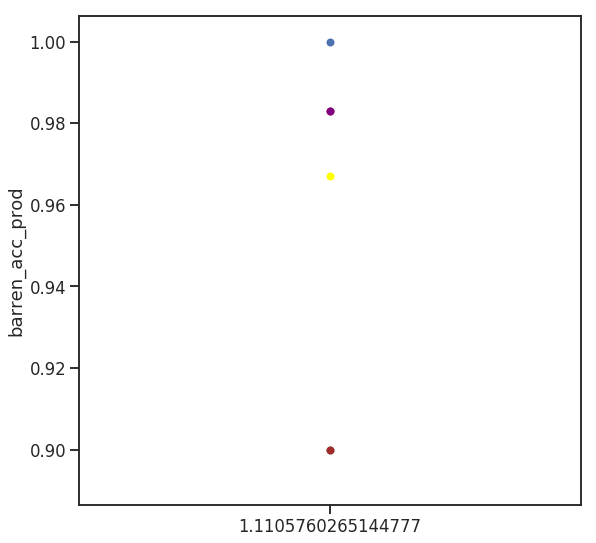

In [139]:
fig, ax = plt.subplots(figsize=(9,9))

jitter = 0.2

sns.swarmplot(x_spacing, experiments['forest_acc_prod'], color='g', size=8)
sns.swarmplot(x_spacing, experiments['dev_acc_prod'], color='r', size=8)
sns.swarmplot(x_spacing, experiments['water_acc_prod'], color='b', size=8)
sns.swarmplot(x_spacing, experiments['wetland_acc_prod'], color='purple', size=8)
sns.swarmplot(x_spacing, experiments['cult_acc_prod'], color='brown', size=8)
sns.swarmplot(x_spacing, experiments['barren_acc_prod'], color='yellow', size=8)
# ax.scatter(x_spacing+[uniform(-jitter, jitter)] * (len(x_spacing)), experiments['dev_acc_prod'], marker='o', facecolors='none', edgecolors='r')
# ax.scatter(x_spacing+[uniform(-jitter, jitter)] * (len(x_spacing)), experiments['water_acc_prod'], marker='o', facecolors='none', edgecolors='b')
# ax.scatter(x_spacing+[uniform(-jitter, jitter)] * (len(x_spacing)), experiments['wetland_acc_prod'], marker='o', facecolors='none', edgecolors='purple')
# ax.scatter(x_spacing+[uniform(-jitter, jitter)] * (len(x_spacing)), experiments['cult_acc_prod'], marker='o', facecolors='none', edgecolors='brown')
# ax.scatter(x_spacing, experiments['barren_acc_prod'], marker='o', facecolors='none', edgecolors='tan')
# ax.set_ylim(0.75,1.01)
# ax.set_xlim(0,7)

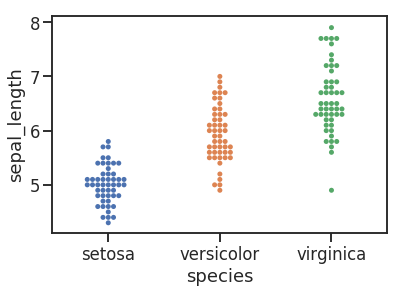

In [128]:
import seaborn as sns

sns.set(style='ticks', context='talk')
iris = sns.load_dataset('iris')

sns.swarmplot('species', 'sepal_length', data=iris)
#sns.despine()

In [133]:
?sns.swarmplot